<a href="https://colab.research.google.com/github/Location-Artistry/GEO-DEV-NOTEBOOKS/blob/main/ArcREST_Data_Explorer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ArcREST Data Explorer**   
# Efficient ArcGIS Server Browsing Library
## Quickly view all services and layers available from an ArcGIS Server URL


### Built on top of bmi-arcgis-restapi library
bmi-arcgis-restapi provides additional functionality beyond the arcgis Python API.  It will use ArcPy if available, or open source libraries if not.
https://github.com/Bolton-and-Menk-GIS/restapi   
Also deploys GeoPandas to read in Layer Query as a GeoDataframe


## Class and Function Definitions
Creates 3 new classes:


1.   mapServer - the root ArcServer Object
2.   mapService - Services contained with the mapServer
3.   mapLayer - Layers available through a mapService




In [ ]:
# Class creates a <-MapService object-> based on restapi.ArcServer from bmi-arcgis-restapi library
class mapServer:
# -init- function, ArcServer object as self.ags, server endpoint as self.url
  def __init__(self, url): 
    self.ags = restapi.ArcServer(url)
    self.url = url
    display('MAPSERVER OBJECT CREATED', self.ags)
# -getServices- displays and returns a list of all ArcGIS services
  def getServices(self):
    for i, service in enumerate(self.ags.services):
      display(f'{i} - Service Name: {service.name} -  Service Type: {service.type}')
    return self.ags.services 
# -getFolders- displays and returns list of all folders
  def getFolders(self):
    for i, folder in enumerate(self.ags.folders):
      display(f'{i} - Folder: {folder}') 
    return self.ags.folders
# -getNesterServ- gets a mapServer's nested services
  def getNestedServices(self):
    for i, folder in enumerate(self.ags.folders):
      display(f'{i} - Folder: {folder}')
      ags = restapi.ArcServer(f'{self.ags.url}/{folder}')
      for z, service in enumerate(ags.services):
        display(f'   {z} - Service Name: {service.name} -  Service Type: {service.type}')
# -getAttr- get atrributes and show values for non-function methods of for MapServer Object
  def getAttr(self):
    for attribute in dir(self.ags):
      display(f'Attribute Names: {attribute} - {self.ags[attribute]}')
# -listAttr- list all attrbutes of MapServer Object
  def listAttr(self):
    return dir(self.ags)
# -getSubService- returns a mapService object within specified mapServer
  def getSubService(self, rootServer=0):
    folders = self.getFolders()
    services = self.getServices()
    if not folders:
      fID = int(input(f'Select index of subservice: '))
      serviceURL = services[fID].name
      subService = self.getService(serviceURL)
      return subService
    else:
      fID = int(input(f'Select index of subservice folder: '))
      serviceURL = (f'{self.url}/{folders[fID]}')
      subFolder = mapServer(serviceURL)
      subServices = subFolder.getServices()
      fID = int(input(f'Select index of subservice: '))
      serviceName = subServices[fID].name
      subService = mapService(self, serviceName)
      return subService

# Class creates a <-MapService object-> based on ags.getService from bmi-arcgis-restapi library
class mapService:
# -init- create mapService from mapServer Class  
  def __init__(self, server, servName): 
    self.ags = server.ags.getService(servName)
    self.url = self.ags.url
    display(f'MAPSERVICE OBJECT CREATED - {self.ags.url}')  
  def getAttr(self):
    for attribute in dir(self.ags):
      display(f'Attribute Names: {attribute} - {self.ags[attribute]}')
  def listAttr(self):
    return dir(self.ags)
  def desc(self):
    return self.ags.description
  def spatialRef(self):
    return self.ags.spatialReference
  def units(self):
    return self.ags.units
  def layers(self):
    return self.ags.list_layers()
  def tables(self):
    return self.ags.list_tables()
# -getLayer- returns a mapLayer from mapService Class
  def getLayer(self):
    for i, lay in enumerate(self.ags.layers):
      display(f'{i} - {lay.name}')
    layers = self.layers()
    fID = int(input(f'Select index of Layer: '))
    layerObj = mapLayer(self, layers[fID])
    return layerObj

# Class creates a <-Layer object-> based on ags.layer from bmi-arcgis-restapi library
class mapLayer:
  def __init__(self, service, lyrName): 
    self.lyr = service.ags.layer(lyrName)
    display(f'LAYER CREATED - {self.lyr.name} - id: {self.lyr.id} - url: {self.lyr.url}')
  def getInfo(self):
    display(f'{self.lyr.name} - subLayers: {self.lyr.subLayers} - capabilities: {self.lyr.capabilities} - query formats: {self.lyr.supportedQueryFormats} - count: {self.lyr.getCount()}')
  def getFields(self):
    return self.lyr.list_fields()
# -layerQuery- prompts user for SQL query and fields, returns geoDataframe object which has access to all pandas/geoPandas methods
  def layerQuery (self):
    baseURL = self.lyr.url
    SQL = input(f'SQL query(ENTER for ALL): ') or '1=1'
    fields = input(f'Fields(ENTER for ALL)? ') or '*'
    RESTurl = (f'{baseURL}/query?f=geojson&where={SQL}&outFields={fields}')
    gdf = gpd.read_file(RESTurl)
    return gdf
  

## Sample Workflow from ArcGIS REST Server Endpoint
Entire Workflow for newly created Arc Server Workflow using bmi-arcgis-restapi


1.   Create mapServer with Server root url
2.   Derive specified MapService from root MapServer Object
3.   Generate layer from specified MapService Endpoint
4.   Return geoDataframe from layer query
5.   Perform data analysis and visualization with gdf



In [ ]:
# 1 - Create MapServer with Server root url
rest_url = 'https://gispub.epa.gov/arcgis/rest/services'
gisServer = mapServer(rest_url)

'MAPSERVER OBJECT CREATED'

<ArcServer: "gispub.epa.gov" ("arcgis")>

In [ ]:
# 2 - Derive specified MapService from root MapServer Object
gisService = gisServer.getSubService()

'0 - Folder: AgSTAR'

'1 - Folder: ER_Harvey'

'2 - Folder: monitor'

'3 - Folder: NELP'

'4 - Folder: NPDAT'

'5 - Folder: OA'

'6 - Folder: OAR'

'7 - Folder: OAR_OAP'

'8 - Folder: OAR_OAQPS'

'9 - Folder: OECA'

'10 - Folder: OEI'

'11 - Folder: ORD'

'12 - Folder: OSWER'

'13 - Folder: OW'

'14 - Folder: PrintTools'

'15 - Folder: R1'

'16 - Folder: R10'

'17 - Folder: R1AUL'

'18 - Folder: r4'

'19 - Folder: r6'

'20 - Folder: r7'

'21 - Folder: R9MarineDebris'

'22 - Folder: R9Watersheds'

'23 - Folder: Region9'

'24 - Folder: SFBayWQIF'

'25 - Folder: Utilities'

Select index of subservice folder: 13


'MAPSERVER OBJECT CREATED'

<ArcServer: "gispub.epa.gov" ("arcgis")>

'0 - Service Name: OW/AquaticNuisanceSpeciesLocator -  Service Type: MapServer'

'1 - Service Name: OW/ATTAINS_Assessment -  Service Type: MapServer'

Select index of subservice: 1


'MAPSERVICE OBJECT CREATED - https://gispub.epa.gov/arcgis/rest/services/OW/ATTAINS_Assessment/MapServer'

In [ ]:
# 3 - Generate layer from specific specified MapService Endpoint
gisLayer = gisService.getLayer()
gisLayer.getInfo()

'0 - ATTAINS Assessment Points'

'1 - ATTAINS Assessment Lines'

'2 - ATTAINS Assessment Areas'

'3 - ATTAINS Assessment Unit Catchment Associations'

Select index of Layer: 0


'LAYER CREATED - ATTAINS Assessment Points - id: 0 - url: https://gispub.epa.gov/arcgis/rest/services/OW/ATTAINS_Assessment/MapServer/0'

'ATTAINS Assessment Points - subLayers: [] - capabilities: Map,Query,Data - query formats: JSON, geoJSON, PBF - count: 4022'

In [ ]:
# 4 - Return geoDataframe from layer query
gdf = gisLayer.layerQuery()
gdf.head()

SQL query(ENTER for ALL): 
Fields(ENTER for ALL)? 


,OBJECTID,submissionid,permid_joinkey,state,region,organizationid,orgtype,tas303d,organizationname,reportingcycle,assessmentunitidentifier,assessmentunitname,waterbodyreportlink,assmnt_joinkey,ircategory,overallstatus,isassessed,isimpaired,isthreatened,on303dlist,hastmdl,hasotherplan,visionpriority303d,drinkingwater_use,ecological_use,fishconsumption_use,recreation_use,other_use,algal_growth,ammonia,biotoxins,cause_unknown,cause_unknown_fish_kills,cause_unknown_impaired_biota,chlorine,dioxins,fish_consumption_advisory,flow_alterations,habitat_alterations,hydrologic_alteration,mercury,metals_other_than_mercury,noxious_aquatic_plants,nuisance_exotic_species,nuisance_native_species,nutrients,oil_and_grease,oxygen_depletion,other_cause,pathogens,pesticides,ph_acidity_caustic_conditions,polychlorinated_biphenyls_pcbs,radiation,solids_chlorides_sulfates,sediment,taste_color_and_odor,temperature,total_toxics,toxic_inorganics,toxic_organics,trash,turbidity,GLOBALID,geometry
0,1,{ea5304a8-04ea-089a-11f9-2c4dc0766643},{B5FB99AA-D105-802E-E053-FEDD43862C34},HI,09,21HI,State,Y,Hawaii,2020,HI138086,Hakalau Co. Pk.,https://mywaterway.epa.gov/waterbody-report/21...,{B5FB99A5-16BB-802E-E053-FEDD43862C34},2,Fully Supporting,Y,N,N,N,N,N,N,None,Not Assessed,None,Fully Supporting,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Meeting Criteria,None,None,None,None,None,None,None,None,None,None,None,None,None,{DCF54C6E-E635-429A-A235-65CA73174ABD},MULTIPOINT (-155.11961 19.88190)
1,2,{1b6f8338-ce5b-b915-b4eb-9a7c84157ddc},{B5FB99AA-DBB4-802E-E053-FEDD43862C34},SC,04,21SC60WQ,State,Y,South Carolina,2016,SCRS-06007,RS-06007,https://mywaterway.epa.gov/waterbody-report/21...,{B5FB99A7-82FD-802E-E053-FEDD43862C34},1,Fully Supporting,Y,N,N,N,N,N,N,None,None,None,Fully Supporting,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,{E05E1267-5661-405D-94EE-613D8239198D},MULTIPOINT (-81.67477 34.49325)
2,3,{ea5304a8-04ea-089a-11f9-2c4dc0766643},{B5FB99AA-DBB5-802E-E053-FEDD43862C34},HI,09,21HI,State,Y,Hawaii,2020,HI167153,Puamana Beach Co. Park,https://mywaterway.epa.gov/waterbody-report/21...,{B5FB99A7-834D-802E-E053-FEDD43862C34},2,Fully Supporting,Y,N,N,N,N,N,N,None,Not Assessed,None,Fully Supporting,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,{21FF59F9-AABC-49B8-A5D6-9A0455150934},MULTIPOINT (-156.67573 20.97868)
3,4,{1b6f8338-ce5b-b915-b4eb-9a7c84157ddc},{B5FB99AA-DBB7-802E-E053-FEDD43862C34},SC,04,21SC60WQ,State,Y,South Carolina,2016,SCMD-273,MD-273,https://mywaterway.epa.gov/waterbody-report/21...,{B5FB99A7-83E5-802E-E053-FEDD43862C34},1,Fully Supporting,Y,N,N,N,N,N,N,None,Fully Supporting,None,Fully Supporting,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,{9CA030FC-AF17-48A9-9D07-1D5F8230FDD7},MULTIPOINT (-80.12743 32.60801)
4,5,{1b6f8338-ce5b-b915-b4eb-9a7c84157ddc},{B5FB99AA-DBB8-802E-E053-FEDD43862C34},SC,04,21SC60WQ,State,Y,South Carolina,2016,SC05-02,05-02,https://mywaterway.epa.gov/waterbody-report/21...,{B5FB99A7-83E6-802E-E053-FEDD43862C34},1,Fully Supporting,Y,N,N,N,N,N,N,None,None,Fully Supporting,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,{2214E7E0-953F-4175-9116-311079BA1622},MULTIPOINT (-79.18339 33.30089)


In [ ]:
gdf.info()

In [ ]:
# List of unique organization IDs
orgIDs = gdf['organizationid'].unique()
display(f'Number of organization IDs: {len(orgIDs)}')
display(orgIDs)

'Number of organization IDs: 21'

array(['21HI', '21SC60WQ', 'MDE_EASP', '21NEV1', '21IOWA', '21NEB001',
       'SANILDEFONSODECP', 'FONDULAC', 'PUEBLOOFTESUQUE', 'SCEQ',
       'O_MTRIBE', 'WA_ECOLOGY', 'DELAWARENATION', '21KY', 'HVTEPA',
       'CNENVSER', 'IL_EPA', 'CHOCNAT', '11113300', 'SFNOES', 'LADEQWPD'],
      dtype=object)

In [ ]:
gdf.overallstatus.value_counts()

Not Supporting      2300
Fully Supporting    1224
Not Assessed         498
Name: overallstatus, dtype: int64

In [ ]:
gdf['state'].unique()

array(['HI', 'SC', 'MD', 'NV', 'IA', 'NE', 'NM', 'MN', 'OK', 'WA', 'KY',
       'CA', 'IL', 'NH', 'LA'], dtype=object)

In [ ]:
gdfIL = gdf[gdf['state'] == 'SC']
gdfIL.describe()

,OBJECTID,reportingcycle
count,1905.000000,1905.0
mean,2003.645669,2016.0
std,1263.946559,0.0
min,2.000000,2016.0
25%,700.000000,2016.0
50%,2219.000000,2016.0
75%,3100.000000,2016.0
max,4021.000000,2016.0


In [ ]:
gdf.groupby('state').count()

,OBJECTID,submissionid,permid_joinkey,region,organizationid,orgtype,tas303d,organizationname,reportingcycle,assessmentunitidentifier,assessmentunitname,waterbodyreportlink,assmnt_joinkey,ircategory,overallstatus,isassessed,isimpaired,isthreatened,on303dlist,hastmdl,hasotherplan,visionpriority303d,drinkingwater_use,ecological_use,fishconsumption_use,recreation_use,other_use,algal_growth,ammonia,biotoxins,cause_unknown,cause_unknown_fish_kills,cause_unknown_impaired_biota,chlorine,dioxins,fish_consumption_advisory,flow_alterations,habitat_alterations,hydrologic_alteration,mercury,metals_other_than_mercury,noxious_aquatic_plants,nuisance_exotic_species,nuisance_native_species,nutrients,oil_and_grease,oxygen_depletion,other_cause,pathogens,pesticides,ph_acidity_caustic_conditions,polychlorinated_biphenyls_pcbs,radiation,solids_chlorides_sulfates,sediment,taste_color_and_odor,temperature,total_toxics,toxic_inorganics,toxic_organics,trash,turbidity,GLOBALID,geometry
state,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CA,11,11,11,11,11,11,11,11,11,11,11,11,11,0,11,11,11,11,0,11,11,0,1,6,0,4,0,0,0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0,11,11
HI,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,0,50,0,50,1,9,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,0,0,0,36,0,0,0,0,0,0,0,0,0,0,0,0,26,50,50
IA,334,334,334,334,334,334,334,334,334,334,334,334,334,334,334,334,334,334,334,334,334,334,13,286,0,187,2,89,0,1,0,2,0,0,0,0,0,2,6,13,0,0,2,0,1,0,9,1,41,1,20,2,0,0,4,0,0,0,0,0,0,74,334,334
IL,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,0,7,7,7,7,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,7,7
KY,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,2,0,18,0,0,0,0,0,0,0,0,0,0,0,0,0,29,29
LA,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,0,0,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,10,10
MD,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,0,5,0,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,29,0,0,0,0,0,0,0,0,0,3,0,0,0,34,34
MN,31,31,31,31,31,31,31,31,31,31,31,31,31,0,31,31,31,31,0,31,31,0,0,31,0,31,31,16,0,0,0,0,6,0,0,0,0,0,0,29,31,0,0,0,16,0,31,0,1,0,31,0,0,31,0,0,31,0,0,0,0,31,31,31
NE,510,510,510,510,510,510,510,510,510,510,510,510,510,510,510,510,510,510,510,510,510,510,4,510,0,510,510,85,1,0,0,0,0,0,0,19,0,0,0,107,0,0,0,0,92,0,14,0,14,0,46,0,0,6,6,0,0,0,0,0,0,0,510,510


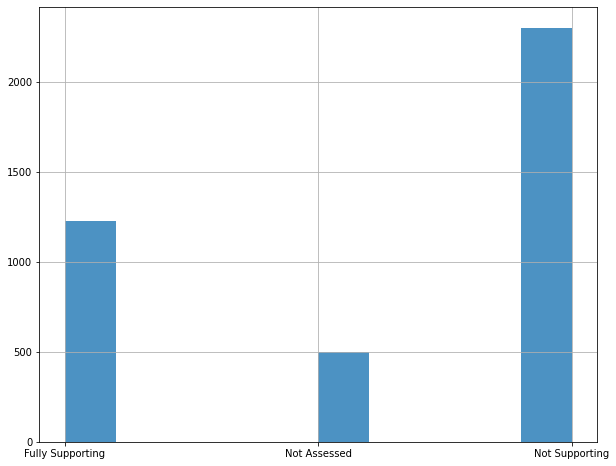

In [ ]:
gdf['overallstatus'].hist(alpha=0.8, figsize=(10,8))

In [ ]:
useStatus = gdf[['state','overallstatus', 'geometry']]

In [ ]:
useStatus = useStatus[useStatus['state'] != 'HI']

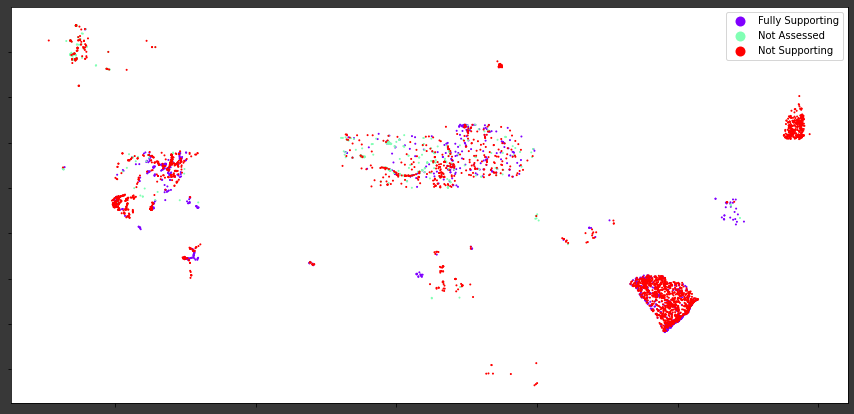

In [ ]:
fig, ax = plt.subplots(figsize=(15,10), facecolor='#383838')
#ax.set_aspect('equal')
ax.set_xticklabels([])
ax.set_yticklabels([])
useStatus.plot(ax=ax, markersize=1, column = 'overallstatus', legend='true', cmap='rainbow');

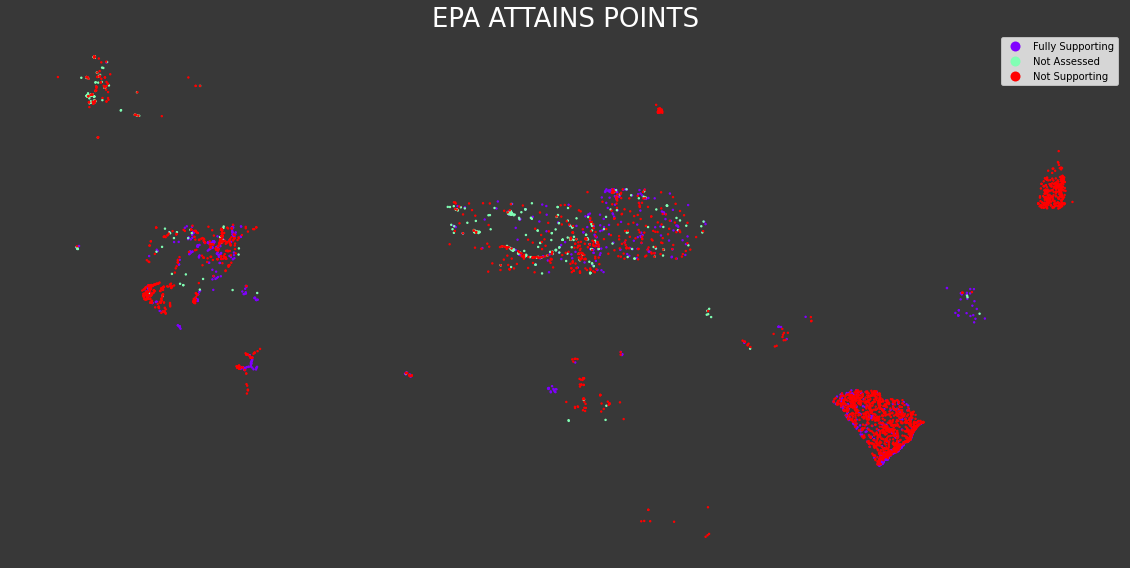

In [ ]:
fig, ax = plt.subplots(figsize=(20,15),facecolor='#383838')
# facecolor #383838 is matched exactly with Colab dark background
# Needs to be set for pyplot
ax.set_aspect('equal')
ax.set_xticklabels([])
ax.set_yticklabels([])
#gdf2.plot(ax=ax, column='NAME', alpha=.5, cmap='Set3', linewidth=2)
#gdf2.boundary.plot(ax=ax, edgecolor='black', linewidth=2, alpha=0.8)
useStatus.plot(ax=ax, markersize=2, column = 'overallstatus', legend='true', cmap='rainbow')
plt.title("EPA ATTAINS POINTS", fontsize=26, color='white')
ax.set_axis_off()
plt.show()

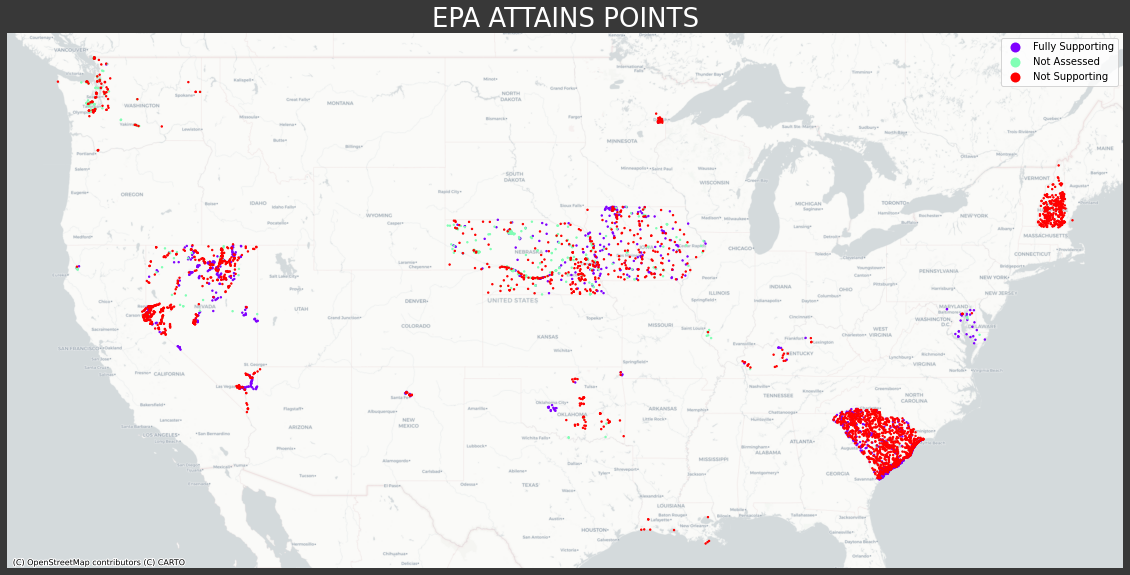

In [ ]:
useStatus = useStatus.to_crs('EPSG:3857')
fig, ax = plt.subplots(figsize=(20,15),facecolor='#383838')
ax.set_aspect('equal')
ax.set_xticklabels([])
ax.set_yticklabels([])
useStatus.plot(ax=ax, markersize=2, column = 'overallstatus', legend='true', cmap='rainbow')
plt.title("EPA ATTAINS POINTS", fontsize=26, color='white')
ax.set_axis_off()
ctx.add_basemap(ax, source=ctx.providers.CartoDB.DarkMatter)
# plt.show()

In [ ]:
 sampStatus = useStatus.sample(500)
 m = folium.Map(location= [27.665, -81.516], zoom_start = 8, tiles = 'Stamen Toner', prefer_canvas=True)
 folium.GeoJson(useStatus).add_to(m)
 m

## APPENDICIES

In [1]:
%%time 
#!apt update
#!apt upgrade
#!apt-get install -qq libgdal-dev libproj-dev
!apt install gdal-bin python-gdal python3-gdal
!apt install python3-rtree 
!pip install git+git://github.com/geopandas/geopandas.git
!pip install descartes
import geopandas as gpd
!pip install contextily
import contextily as ctx
!pip install pygeos
!pip install folium

!pip install bmi-arcgis-restapi
import restapi

from pathlib import Path
from shapely.geometry import Point
from IPython.display import display
from IPython.display import Markdown as md
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import folium

Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
python3-gdal is already the newest version (2.2.3+dfsg-2).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
  python3-pkg-resources
Suggested packages:
  python3-setuptools
The following NEW packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
  python3-pkg-resources python3-rtree
0 upgraded, 5 newly installed, 0 to remove and 16 not upgraded.
Need to get 671 kB of archives.
After this operation, 3,948 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex4v5 

/usr/local/lib/python3.6/dist-packages/restapi/common_types.py:35: UserWarning: No Arcpy found, some limitations in functionality may apply.
  warnings.warn('No Arcpy found, some limitations in functionality may apply.')


CPU times: user 1.2 s, sys: 310 ms, total: 1.51 s
Wall time: 53.1 s


## Previous list of installs/imports

In [ ]:
# view all installed packages on Colab
!pip list -v

In [ ]:
# Install and load libraries, may be able to remove some uneeded libraries
%%time 
#!pip install descartes 
#!pip install folium
#!pip install arcgis
#!pip install contextily
#!pip install xlsxwriter
#import sys
#import os
#from zipfile import ZipFile
#import datetime as dt
#import requests
from arcgis.gis import GIS
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import matplotlib
import matplotlib.pyplot as plt 
#import folium
from IPython.display import display
#import contextily as ctx
#from IPython.display import Image
from IPython.display import Markdown as md